In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import scipy
import scipy.stats as st 

In [2]:
arc_res = pd.read_csv("../results/original.res.CD.csv", index_col=0)
arc_res.index = arc_res.index.str.replace(r'^g__', '', regex=True)
arc_col = np.sign(arc_res["Estimate"])
arc_col = (arc_res["padj"]<=0.05).astype(int)*arc_col
vand_res = pd.read_csv("../results/vand.res.csv", index_col=0)
vand_col = np.sign(vand_res["est"])
vand_col = (vand_res["padj"]<=0.05).astype(int)*vand_col
sr_mem_res = pd.read_csv("../results/sr.mem.res.CD.csv", index_col=0)
sr_mem_res.index = sr_mem_res.index.str.replace(r'^g__', '', regex=True)
sr_col = np.sign(sr_mem_res["est"])
sr_col = (sr_mem_res["padj"]<=0.05).astype(int)*sr_col
clr_mem_res = pd.read_csv("../results/clr.mem.res.CD.csv", index_col=0)
clr_mem_res.index = clr_mem_res.index.str.replace(r'^g__', '', regex=True)
clr_col = np.sign(clr_mem_res["est"])
clr_col = (clr_mem_res["padj"]<=0.05).astype(int)*clr_col

count_stats = pd.read_csv("../results/count.stats.csv", index_col=0)
count_stats = count_stats.sort_values(by='log2_mean', ascending=False)
count_stats.index = count_stats.index.str.replace(r'^g__', '', regex=True)
count_stats = count_stats[~(count_stats.index.str.contains("unclassified") | (count_stats.index == "44") | (count_stats.index == "Eubacterium") )]
count_stats = count_stats.head(20)

vand_col = vand_col.reindex(vand_col.index.union(count_stats.index), fill_value=0)
clr_mem_res

,est,padj
Bacteroides,-0.188010,9.659136e-01
Parabacteroides,-2.728835,4.607238e-01
Faecalibacterium,-6.882938,1.544091e-08
Alistipes,-5.288324,2.528577e-02
Ruminococcus,-4.633570,3.003998e-02
Dorea,-2.507709,1.708256e-01
Oscillibacter,-4.418106,7.022757e-02
Flavonifractor,2.403969,4.327877e-01
Odoribacter,-1.058058,9.431586e-01
Blautia,2.621580,3.364938e-02


In [3]:
writer = pd.ExcelWriter('../../../supplement/Fig_3_supplement.xlsx', engine='xlsxwriter')
arc_res_UC = pd.read_csv("../results/original.res.UC.csv", index_col=0)
sr_mem_res_UC = pd.read_csv("../results/sr.mem.res.UC.csv", index_col=0)
clr_mem_res = pd.read_csv("../results/clr.mem.res.UC.csv", index_col=0)

arc_res_UC.to_excel(writer, sheet_name='ASR_UC', index=True)
sr_mem_res_UC.to_excel(writer, sheet_name='SR_MEM_UC', index=True)
clr_mem_res.to_excel(writer, sheet_name='SR_MEM_CLR_UC', index=True)
writer.close()

In [4]:
df_cols = []
biases = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
for b in biases:
    df = pd.read_csv("../results/sr.mem.res.bias.{}.csv".format(b), index_col=0)
    df.index = df.index.str.replace(r'^g__', '', regex=True)
    df_col = np.sign(df["est"])
    df_col = (df["padj"]<=0.05).astype(int)*df_col
    df_cols.append(df_col)
bdf = pd.concat(df_cols, axis=1)
bdf.columns = biases
bdf = bdf.loc[count_stats.index]
bdf

,-5,-4,-3,-2,-1,0,1,2,3,4,5
Bacteroides,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-0.0
Faecalibacterium,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Roseburia,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0
Parabacteroides,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0
Blautia,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,0.0,0.0,1.0
Alistipes,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0
Flavonifractor,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
Dorea,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0
Fusicatenibacter,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0
Anaerostipes,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-0.0


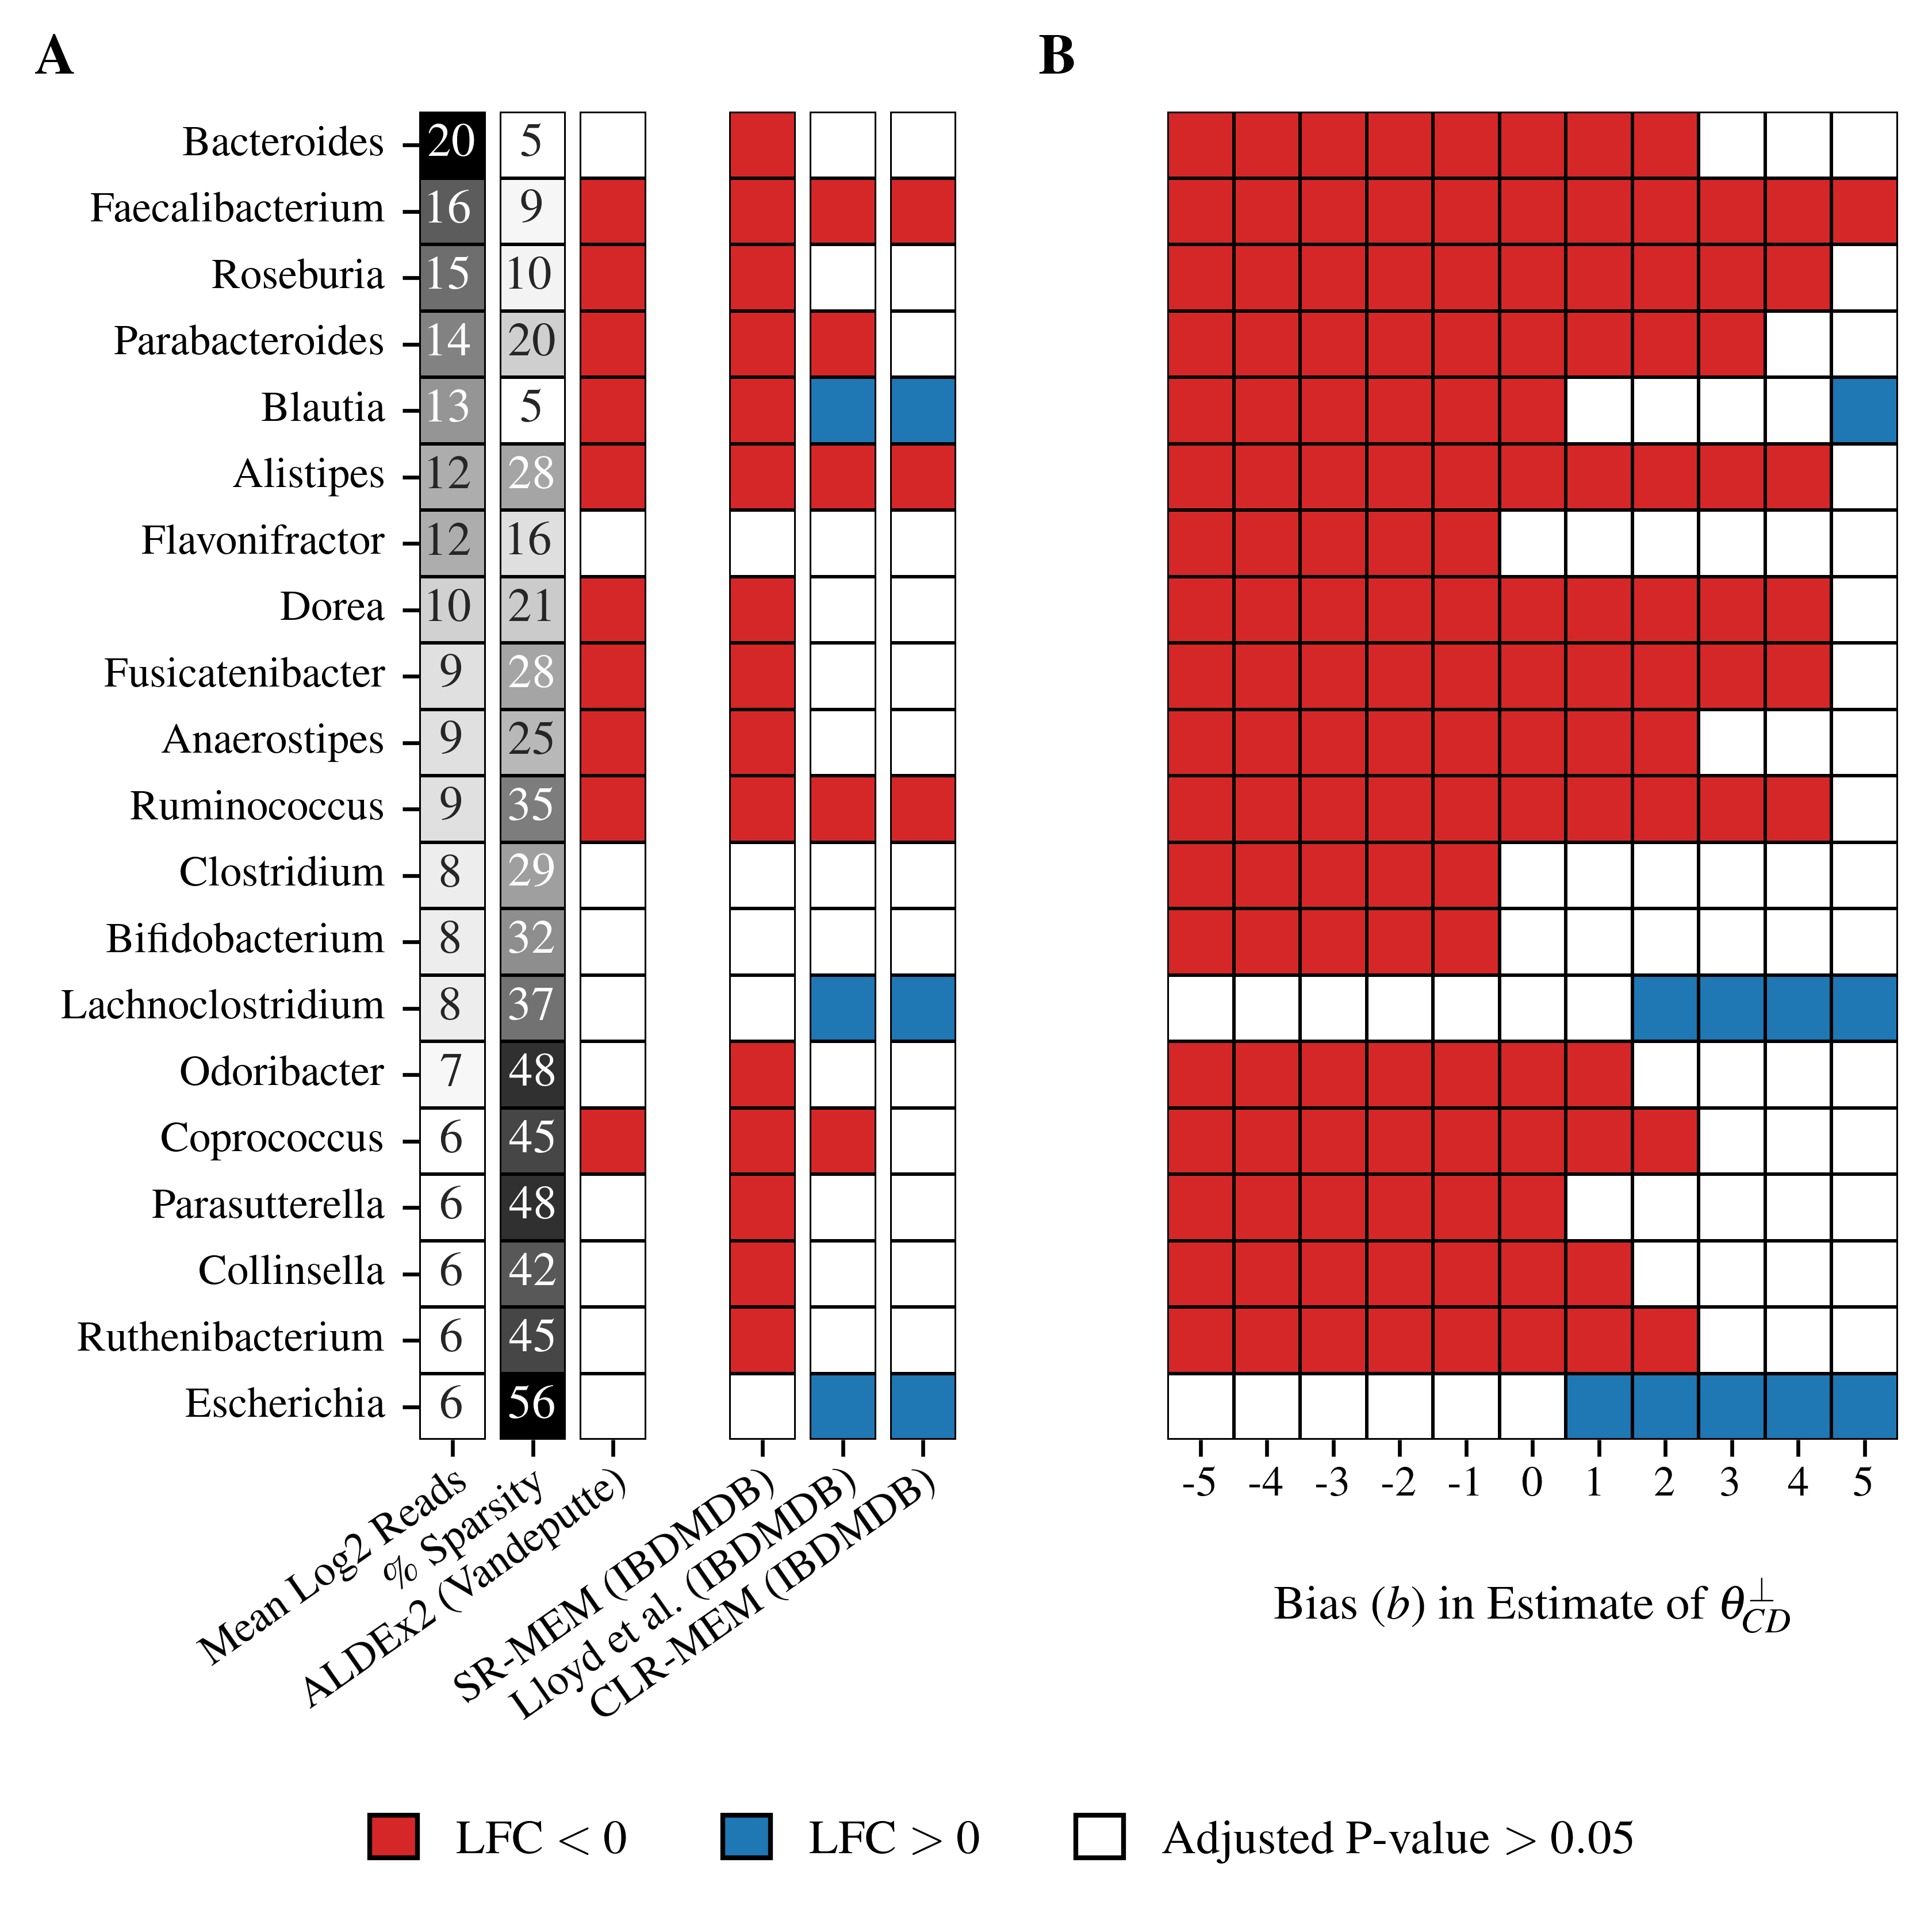

In [5]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

width = 6.75
height = 5
dpi = 600
pw = width*dpi
ph = height*dpi
fontsize=11
color_map = {'grey': 0, 'blue': 1, 'red': -1}

# Define figure
fig = plt.figure(figsize=(pw/dpi, ph/dpi), dpi=dpi)
outer_gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5], wspace=-0.12)
left_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[0], wspace=0.3)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=left_gs[0], wspace=0.03)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=left_gs[1], wspace=0.03)
right_gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer_gs[1])
ax1 = fig.add_subplot(gs0[0])
ax2 = fig.add_subplot(gs0[1])
ax3 = fig.add_subplot(gs0[2])
ax4 = fig.add_subplot(gs1[0])
ax5 = fig.add_subplot(gs1[1])
ax6 = fig.add_subplot(gs1[2])
ax7 = fig.add_subplot(right_gs[0])

colnames = ["Mean Log2 Reads", "\\% Sparsity", "ALDEx2 (Vandeputte)",  "SR-MEM (IBDMDB)", "Lloyd et al. (IBDMDB)", "CLR-MEM (IBDMDB)"]
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
for i, cols in enumerate([count_stats["log2_mean"].round(), count_stats["sparsity"].round(), vand_col, sr_col, arc_col, clr_col]):
    if i==0:
        yticklabels = True
    else:
        yticklabels = False
    if i==2 or i == 3:
        cmap = sns.color_palette(['#d62728', "white"], as_cmap=True)
        annot = False
    elif i in [0, 1]:
        cmap = "Greys"
        annot = True
    else:
        cmap = sns.color_palette(['#d62728', "white", '#1f77b4'], as_cmap=True)
        annot = False
    sns.heatmap(
        data=pd.DataFrame(cols.loc[count_stats.index]),
        annot=annot,
        yticklabels=yticklabels,
        xticklabels=True,
        cbar=False,
        linecolor="black",
        linewidths=0.5,
        cmap=cmap,
        ax=axs[i], square=True)
    if yticklabels:
        axs[i].set_yticklabels(ax1.get_yticklabels(), fontsize=fontsize-2)
    axs[i].set_xticklabels([colnames[i]], rotation=35, ha='right', va='top',
                           fontsize=fontsize-2, rotation_mode="anchor")
    axs[i].tick_params(axis='x', pad=1)
sns.heatmap(
    data=bdf,
    annot=False,
    yticklabels=False,
    xticklabels=True,
    cbar=False,
    linecolor="black",
    linewidths=0.5,
    cmap=sns.color_palette(['#d62728', "white",
                            '#1f77b4'], as_cmap=True),
    ax=ax7, square=True)
ax7.set_xticklabels(ax7.get_xticklabels(), fontsize=fontsize-2)
ax7.set_xlabel("Bias ($b$) in Estimate of $\\theta^\\perp_{CD}$",
               fontsize=fontsize-1, labelpad=15)
ax7.tick_params(axis='x', pad=2)

fig.text(-0.02, 0.925, r"\textbf{A}", ha='right', va='top', fontsize=fontsize+1)
fig.text(0.41, 0.925, r"\textbf{B}", ha='right', va='top', fontsize=fontsize+1)
legend_elements = [Patch(facecolor='#d62728', edgecolor='black', label='LFC $< 0$'),
                   Patch(facecolor='#1f77b4', edgecolor='black', label='LFC $> 0$'),
                   Patch(facecolor='white',   edgecolor='black', label='Adjusted P-value $> 0.05$')]
ax7.legend(bbox_to_anchor=(0.7, -0.25), handles=legend_elements, frameon=False, ncol=3,
           fontsize=fontsize-1, handlelength=1, handleheight=1)

In [6]:
fig.savefig('../../../figures/Figure_3.png', bbox_inches='tight')